In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from bluepysnap import Circuit
from bluepysnap.bbp import Cell

CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["S1nonbarrel_neurons"]
nodesinfo = cells.get()

# NetPyNE

In [2]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [3]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

Epops = []
Ipops = []

cellName_list2 = []

for gid in [133426]:

    cellName = nodesinfo['mtype'][gid] # + '_' + nodesinfo['etype'][gid]
        
    cellName_list2.append(cellName)
    
    cellName_list[gid] = cellName

    if cellName not in gid_list.keys():
        gid_list[cellName] = []
        if 'cADpyr' in cellName:
            Epops.append(cellName)
        else:
            Ipops.append(cellName)

    gid_list[cellName].append(gid)
    
    print('%d %s %d' % (gid,cellName, len(gid_list[cellName])))


133426 L4_TPC 1


In [4]:
def distance3Dsoma(x, y, z):
    return np.sqrt(np.power(x,2)+np.power(y,2)+np.power(z,2))

def distance3D(x, y, z, x2, y2, z2):
    return np.sqrt(np.power(x-x2,2)+np.power(y-y2,2)+np.power(z-z2,2))

In [5]:
cellsList = {}
giderror = []

for popName in sorted(gid_list.keys()):

    cellsList[popName] = []

    try:
                
        for gid in gid_list[popName]:

            cellName = popName + "_gid_" + str(gid)

            # MorphoName = nodesinfo['morphology'][gid] + '.asc'

            hocName = nodesinfo['model_template'][gid][4:]  

            # MorphologyPath = 'O1_data_physiology/morphologies2/ascii/'
            # MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"

            MorphologyPath = 'O1_data_physiology/morphologies/ascii/'            
            MorphoName = nodesinfo['morphology'][gid]+".asc"
                
            cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
                conds={'cellType': cellName, 'cellModel': 'HH_full'},
                fileName='O1_data_physiology/emodels_hoc2/' + hocName + '.hoc',
                cellName=hocName,
                cellInstance = False,
                cellArgs=[gid, MorphologyPath, MorphoName])            

            print(popName, cellName, hocName, netParams.cellParams[cellName]['secLists']['axonal'][-1])

            for axx in netParams.cellParams[cellName]['secLists']['axonal'][0:]:
                center = int(len(netParams.cellParams[cellName]['secs'][axx]['geom']['pt3d'])/2)
                x, y, z, d = list(netParams.cellParams[cellName]['secs'][axx]['geom']['pt3d'][0])
                x2, y2, z2, d = list(netParams.cellParams[cellName]['secs'][axx]['geom']['pt3d'][-1])
                # print(axx, center, d, distance3Dsoma(x, y, z), distance3D(x, y, z, x2, y2, z2),netParams.cellParams[cellName]['secs'][axx]['geom'])


            mechs_pas = netParams.cellParams[cellName]['secs']['soma_0']['mechs']['pas']

            # for axx in netParams.cellParams[cellName]['secLists']['axonal'][3:]:
                
            #     del netParams.cellParams[cellName]['secs'][axx]['mechs']

            #     if netParams.cellParams[cellName]['secs'][axx]['geom']['L'] > 100:
            #         mechs_pas = netParams.cellParams[cellName]['secs']['soma_0']['mechs']['pas']
            #         netParams.cellParams[cellName]['secs'][axx]['geom']['cm'] = 0.02
            #     else:
            #         mechs_pas = netParams.cellParams[cellName]['secs']['axon_0']['mechs']['pas']

            #     netParams.cellParams[cellName]['secs'][axx]['mechs'] = {}
            #     netParams.cellParams[cellName]['secs'][axx]['mechs']['pas'] = mechs_pas
            #     netParams.cellParams[cellName]['secs'][axx]['geom']['nseg'] = 1

                
            for axx in netParams.cellParams[cellName]['secLists']['axonal'][3:]:
                
                del netParams.cellParams[cellName]['secs'][axx]['mechs']
                netParams.cellParams[cellName]['secs'][axx]['mechs'] = {}
                netParams.cellParams[cellName]['secs'][axx]['mechs']['pas'] = mechs_pas
                netParams.cellParams[cellName]['secs'][axx]['geom']['nseg'] = 1
                netParams.cellParams[cellName]['secs'][axx]['geom']['cm'] = 0.02

            

            # for axx in netParams.cellParams[cellName]['secLists']['axonal'][:5]:
            #     print(axx,netParams.cellParams[cellName]['secs'][axx]['topol'],netParams.cellParams[cellName]['secs'][axx]['geom']['L'],netParams.cellParams[cellName]['secs'][axx]['geom']['diam']) 
                
            # for axx in netParams.cellParams[cellName]['secLists']['basal'][:5]:
            #     print(axx,netParams.cellParams[cellName]['secs'][axx]['topol'],netParams.cellParams[cellName]['secs'][axx]['geom']['L'],netParams.cellParams[cellName]['secs'][axx]['geom']['diam']) 
                
            # for axx in netParams.cellParams[cellName]['secLists']['apical'][:5]:
            #     print(axx,netParams.cellParams[cellName]['secs'][axx]['topol'],netParams.cellParams[cellName]['secs'][axx]['geom']['L'],netParams.cellParams[cellName]['secs'][axx]['geom']['diam']) 
                
            # netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam'] = 1.0
            # netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam'] = 0.5
            # netParams.cellParams[cellName]['secs']['axon_2']['geom']['diam'] = 0.5
            # netParams.cellParams[cellName]['secs']['axon_0']['geom']['L'] = 30.0
            # netParams.cellParams[cellName]['secs']['axon_1']['geom']['L'] = 30.0
            # netParams.cellParams[cellName]['secs']['axon_2']['geom']['L'] = 30.0
            

            cellsList[popName].append({'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]})
            # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

            morphoNumbers = len(gid_list[popName])
            cellFraction = 1.0/morphoNumbers

            cellRule = {'conds': {'cellType': popName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
            cellRule['secs'] = netParams.cellParams[cellName]['secs']     
            cellRule['conds'] = netParams.cellParams[cellName]['conds']    
            cellRule['conds']['cellType'] = popName
            cellRule['globals'] = netParams.cellParams[cellName]['globals']       
            cellRule['secLists'] = netParams.cellParams[cellName]['secLists']      
            cellRule['secLists']['spiny'] = {}
            cellRule['secLists']['spinyEE'] = {}
            nonSpiny = netParams.cellParams[cellName]['secLists']['axonal']
            cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
            cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny and 'soma' not in sec]
            netParams.cellParams[cellName] = cellRule   # add dict to list of cell params  

    except:
        giderror.append(gid)

L4_TPC L4_TPC_gid_133426 cADpyr_L4TPC axon_95


In [6]:
center = int(len(netParams.cellParams[cellName]['secs']['axon_7']['geom']['pt3d'])/2)
x, y, z, d = list(netParams.cellParams[cellName]['secs']['axon_7']['geom']['pt3d'][0])
x2, y2, z2, d = list(netParams.cellParams[cellName]['secs']['axon_7']['geom']['pt3d'][-1])
print(axx, center, x, y, z, d, distance3Dsoma(x, y, z), distance3D(x, y, z, x2, y2, z2),netParams.cellParams[cellName]['secs']['axon_7']['geom'])

axon_95 50 -10.520297825336456 -217.7623084783554 16.11516820639372 0.28999999165534973 218.6110662946333 107.41834737919048 {L: 109.73134050203096, nseg: 1, diam: 0.2899999916553498, Ra: 100.0, cm: 0.02, pt3d: [(-10.520297825336456, -217.7623084783554, 16.11516820639372, 0.28999999165534973), (-10.697256863117218, -218.62313306331635, 16.038076989352703, 0.28999999165534973), (-10.689043819904327, -219.68085706233978, 16.00349485129118, 0.28999999165534973), (-10.597752392292023, -220.58417737483978, 15.965548150241375, 0.28999999165534973), (-10.424840748310089, -221.88886487483978, 15.749408356845379, 0.28999999165534973), (-10.274472057819366, -222.94349133968353, 15.535484902560711, 0.28999999165534973), (-9.996638119220734, -224.7873328924179, 15.151161782443523, 0.28999999165534973), (-9.761296093463898, -226.01664197444916, 14.899197213351727, 0.28999999165534973), (-9.581315815448761, -226.78875195980072, 14.739054314792156, 0.28999999165534973), (-8.945178806781769, -229.4008

In [7]:
# center = int(len(netParams.cellParams[cellName]['secs']['axon_7']['geom']['pt3d'])/2)
# x2, y2, z2 = 0, 0, 0
# for i in range(100):
#     x, y, z, d = list(netParams.cellParams[cellName]['secs']['axon_7']['geom']['pt3d'][int(i)])
#     print(center, int(i), x, y, z, d, distance3Dsoma(x, y, z), distance3D(x, y, z, x2, y2, z2))
#     x2, y2, z2 = x, y, z

In [8]:
# [x[0] for x in list(netParams.cellParams[cellName]['secs']['axon_7']['geom']['pt3d'])]

In [9]:
# for axx in netParams.cellParams[cellName]['secLists']['axonal']:
#     if int(axx.split("_")[-1]) == int(netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'].split("_")[-1]) + 1:
#         print(axx, netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'], netParams.cellParams[cellName]['secs'][axx]['geom']['L'])    
#     else:
#         print(axx, netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'])


In [10]:
# cont = 0
# delaxons = []
# for axx in netParams.cellParams[cellName]['secLists']['axonal'][3:]:
#     if int(axx.split("_")[-1]) != int(netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'].split("_")[-1]) + 1 or netParams.cellParams[cellName]['secs'][axx]['geom']['L'] > 100:
#         print(int(axx.split("_")[-1]), netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'], netParams.cellParams[cellName]['secs'][axx]['geom']['L'])    
#         delaxons.append(axx)
    
#     elif int(axx.split("_")[-1]) == int(netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'].split("_")[-1]) + 1:
#         cont+=1
#         if cont == 2:
#             print(int(axx.split("_")[-1]), netParams.cellParams[cellName]['secs'][axx]['topol']['parentSec'], netParams.cellParams[cellName]['secs'][axx]['geom']['L'])    
#             delaxons.append(axx)
#             cont = 0

In [11]:
# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000			 
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 30.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 30.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True
   
netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)
    
#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------
for metype in Epops + Ipops:    
    layernumber = metype[1:2]
    if layernumber == '2':
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                            'numCells':10, 'diversity': True}
    else:
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                            'numCells': 10, 'diversity': True}

In [12]:
netParams.popParams.keys()

odict_keys(['L4_TPC'])

In [13]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 0.6*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -84.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.recordCells = list(netParams.popParams.keys())
# cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record  
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    'V_axon_86': {'sec':'axon_86', 'loc':0.5, 'var':'v'},
                    # 'V_axon_5': {'sec':'axon_5', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_7': {'sec':'apic_7', 'loc':0.5, 'var':'v'},       
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},           
                    'V_dend_10': {'sec':'dend_10', 'loc':0.5, 'var':'v'},       
                    # 'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.025       

# cfg.saveLFPPops =  cfg.recordCells 

cfg.recordLFP = [[x, y, 150] for y in [400, 500, 600] for x in [-85, 15, 115]] # 1 elec in L1 and 3 elec in L5  
# cfg.recordLFP = [[100, 600, 15]] # 1 elec in L1 and 3 elec in L5  

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# Analysis and plotting 
# ------------------------------------------------------------------------------
# cfg.analysis['plotRaster'] = {'include': cfg.S1cells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (24,8), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300} 
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}

cfg.recordLFP

[[-85, 400, 150],
 [15, 400, 150],
 [115, 400, 150],
 [-85, 500, 150],
 [15, 500, 150],
 [115, 500, 150],
 [-85, 600, 150],
 [15, 600, 150],
 [115, 600, 150]]

In [14]:
#------------------------------------------------------------------------------  
# Thalamic Cells

cfg.cellNumber = {}
cfg.popLabel = {}
cfg.popNumber = {}
 
cfg.thalamicpops = ['VPM_sTC']
cfg.cellNumber['VPM_sTC'] = 200 # 839

for mtype in cfg.thalamicpops: # No diversity
	metype = mtype
	cfg.popLabel[metype] = mtype
	cfg.popNumber[mtype] = cfg.cellNumber[metype]

## Th->S1
cfg.connect_ThVecStim_S1 = True
cfg.TC_S1 = {}
cfg.TC_S1['VPM_sTC'] = True
cfg.TC_S1_weightE = 0.00015
cfg.TC_S1_weightI = 0.00025

# homogeneous_poisson at 3Hz cos wave and FR~30Hz
cfg.tmin = 500
cfg.tdur = 40
cfg.max_rate = 100.00
cfg.f_osc = 0.01
cfg.bin_size = 0.05

# Th
netParams.synMechParams['NMDA_Th']             = {'mod': 'MyExp2SynNMDABB',    'tau1NMDA': 15, 'tau2NMDA': 150,                'e': 0}
netParams.synMechParams['AMPA_Th']             = {'mod': 'MyExp2SynBB',        'tau1': 0.05,   'tau2': 5.3, 'e': 0}
netParams.synMechParams['GABAB_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 3.5,    'tau2': 260.9,                  'e': -93} 
netParams.synMechParams['GABAA_Th']            = {'mod': 'MyExp2SynBB',        'tau1': 0.07,   'tau2': 18.2,                   'e': -80}
ESynMech_Th = ['AMPA_Th', 'NMDA_Th']

#------------------------------------------------------------------------------
# ThVecStim->S1 connectivity parameters
#------------------------------------------------------------------------------
time = np.arange(0, cfg.tdur, 1)
rate = cfg.max_rate * (np.cos(2*np.pi*cfg.f_osc*time)+1)/2

allspikes = []

def inhomogeneous_poisson(rate, bin_size):
    n_bins = len(rate)
    spikes = np.random.rand(n_bins) < rate * bin_size
    spike_times = cfg.tmin + np.nonzero(spikes)[0] * bin_size
    # print(spike_times)
    for spkk in spike_times[:1]:
        allspikes.append(spkk)
    return spike_times

# print(cfg.thalamicpops)
# create 1 vectstim pop per cell gid
for metype in cfg.thalamicpops: # metype

    # print(metype, cfg.cellNumber[metype])
    
    cellsList = []            
    for cellLabel in range(cfg.cellNumber[metype]): # all cells in metype
        spike_times = inhomogeneous_poisson(rate, cfg.bin_size)
        cellsList.append({'cellLabel': cellLabel, 'spkTimes': [1, spike_times[0]]})
        # cellsList.append({'cellLabel': cellLabel, 'spkTimes': list(spike_times[:1])})
        # print(cellLabel, spike_times[::3])
        
    if np.size(cellsList) > 0:
        netParams.popParams[metype] = {'cellModel': 'VecStim', 'cellsList': cellsList}        


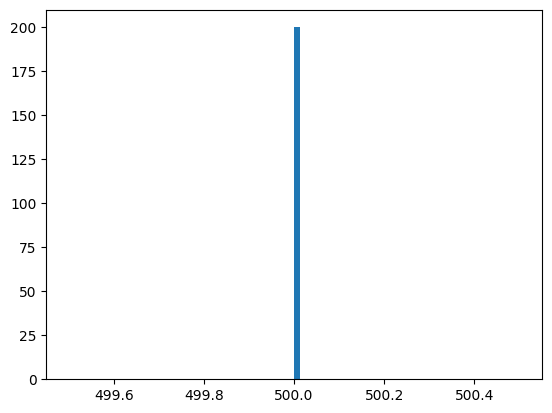

In [15]:
plt.hist(allspikes, bins=80);

In [16]:

if cfg.connect_ThVecStim_S1:

    # for post in Epops: 
    #     convergence_Th_S1['VPM_sTC']['L4_PC'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SP'] = 197
    #     convergence_Th_S1['VPM_sTC']['L4_SS'] = 188
    #     convergence_Th_S1['VPM_sTC']['L4_INH'] = 116

    ## Connectivity rules
    synapsesperconnection_Th_S1 = 9.0
    for pre in ['VPM_sTC']:  #  
        if cfg.TC_S1[pre]:
            for post in Epops: 
                
                if 'L4_SS' in post:
                    conn_convergence = np.ceil(188/synapsesperconnection_Th_S1)
                else:
                    conn_convergence = np.ceil(197/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': 0.0002,   # synaptic weight 
                    'sec': 'all', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

                if 'L4_UPC' in post:
                    netParams.connParams['thal_'+pre+'_'+post]['weight'] = 0.0002

                if 'L4_TPC' in post:
                    netParams.connParams['thal_'+pre+'_'+post]['weight'] = 0.0005

            for post in Ipops: 
                
                conn_convergence = np.ceil(116/synapsesperconnection_Th_S1)

                netParams.connParams['thal_'+pre+'_'+post] = { 
                    'preConds': {'pop': pre},  ####################################################
                    'postConds': {'pop': post},
                    'weight': cfg.TC_S1_weightI,   # synaptic weight 
                    'sec': 'somatic', # target postsyn section
                    'delay': 'defaultDelay',
                    'synsPerConn': int(synapsesperconnection_Th_S1),                     
                    'synMech': ESynMech_Th}  

                netParams.connParams['thal_'+pre+'_'+post]['convergence'] = conn_convergence 

In [17]:
#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
# Spont and BG
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}
netParams.synMechParams['GABAB'] = {'mod':'MyExp2SynBB', 'tau1': 3.5, 'tau2': 260.9, 'e': -93} 
ESynMech = ['AMPA', 'NMDA']
ISynMech = ['GABAA', 'GABAB']

cfg.addStimSynS1 = True
cfg.Ipops = Ipops
cfg.Epops = Epops
cfg.rateStimI = 50.0 # Hz
cfg.rateStimE = 20.0
SourcesNumber = 10 # for each post Mtype - sec distribution

if cfg.addStimSynS1:      
    for post in cfg.Ipops + cfg.Epops:

        synperNeuron = 10
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = 10
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'synMech': 'AMPA', 
                'conds': {'cellType': post}, 
                'sec': 'all', 
                'weight': 0.5,
                'delay': 0.1}

    for post in cfg.Epops+cfg.Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': post}, 
                'synMech': 'GABAA', 
                'sec': 'all', 
                'weight': 0.5,
                'delay': 0.1}


In [18]:
print(netParams.connParams.keys())

odict_keys(['thal_VPM_sTC_L4_TPC'])


In [19]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation  


Start time:  2025-03-28 16:26:08.440447

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 210 
  Done; cell creation time = 0.91 s.
Making connections...
  Number of connections on node 0: 130 
  Number of synaptic contacts on node 0: 2340 
  Done; cell connection time = 0.14 s.
Adding stims...
  Number of stims on node 0: 200 
  Done; cell stims creation time = 0.05 s.
Recording 50 traces of 5 types on node 0
0.0s

Running simulation using NEURON for 600.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
  Done; run time = 230.29 s; real-time ratio: 0.00.


In [20]:
#   Number of connections on node 0: 770 
#   Number of synaptic contacts on node 0: 21235 

In [21]:
sim.gatherData();                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))


Gathering data...
  Done; gather time = 0.46 s.

Analyzing...
  Cells: 210
  Connections: 140 (0.67 per cell)
  Synaptic contacts: 2540 (12.10 per cell)
  Spikes: 420 (3.33 Hz)
  Simulated time: 0.6 s; 1 workers
  Run time: 230.29 s
   L4_TPC : 3.333 Hz
   VPM_sTC : 3.333 Hz


In [22]:
# for j in range(6):
#     sim.analysis.plotTraces(include= [ii for ii in range(5*j,5*j+5,1)], timeRange=[400,500], axis=False, overlay=True, oneFigPer='trace', figSize=(15,2.1));

In [23]:
# sim.analysis.plotRaster(include=Epops+Ipops, timeRange=[500,510], figSize=(18,8), popRates=True);

Plotting recorded cell traces ... trace


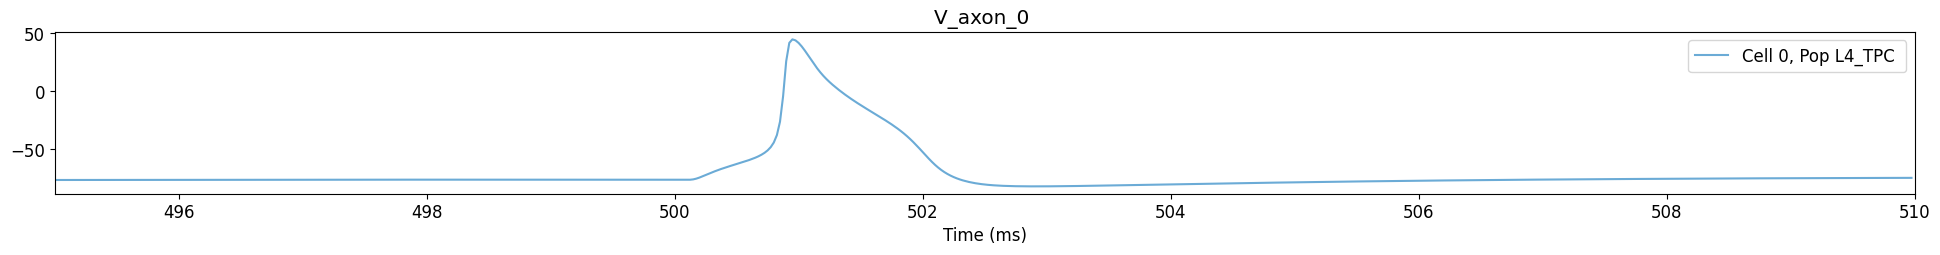

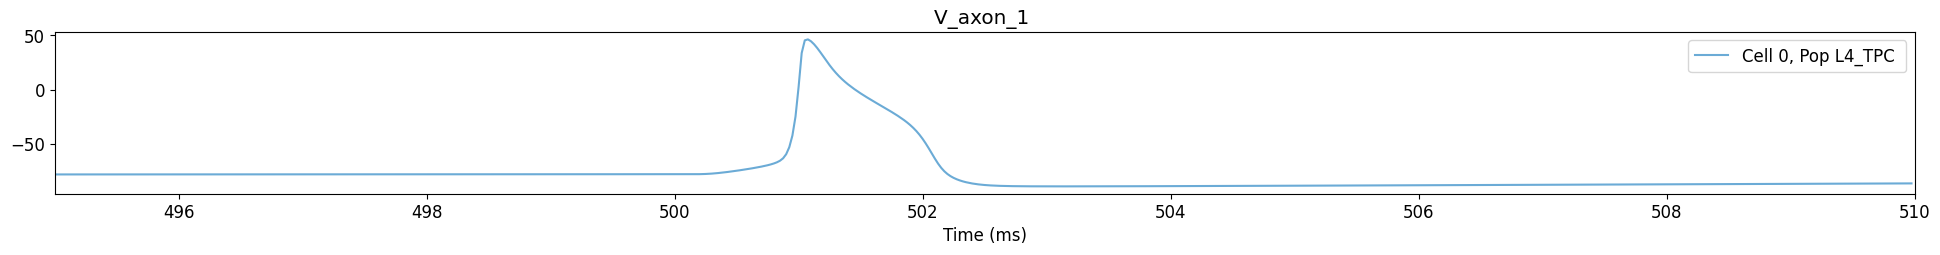

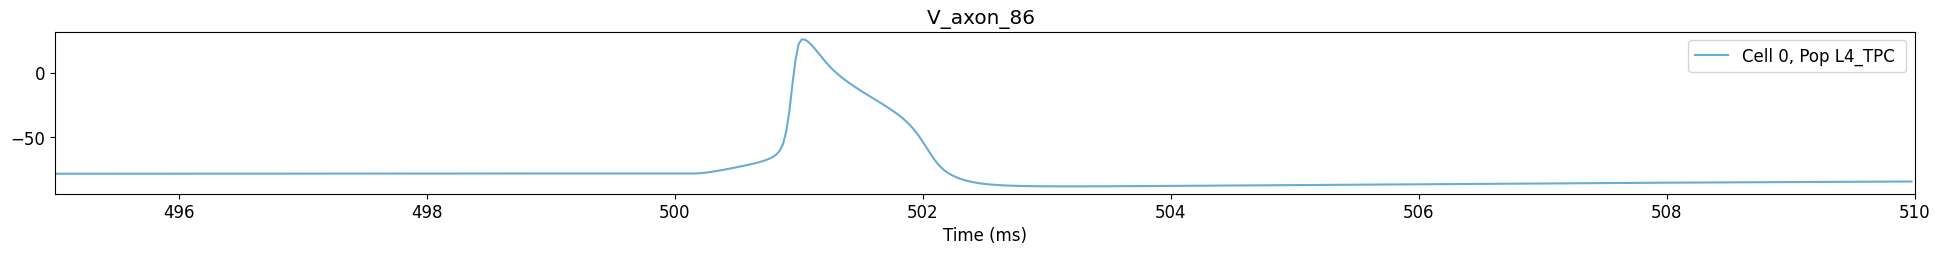

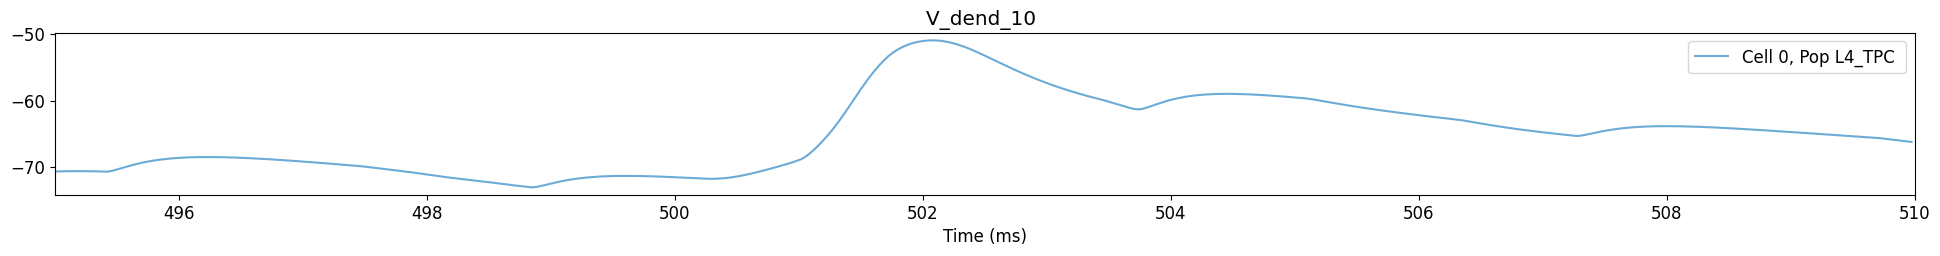

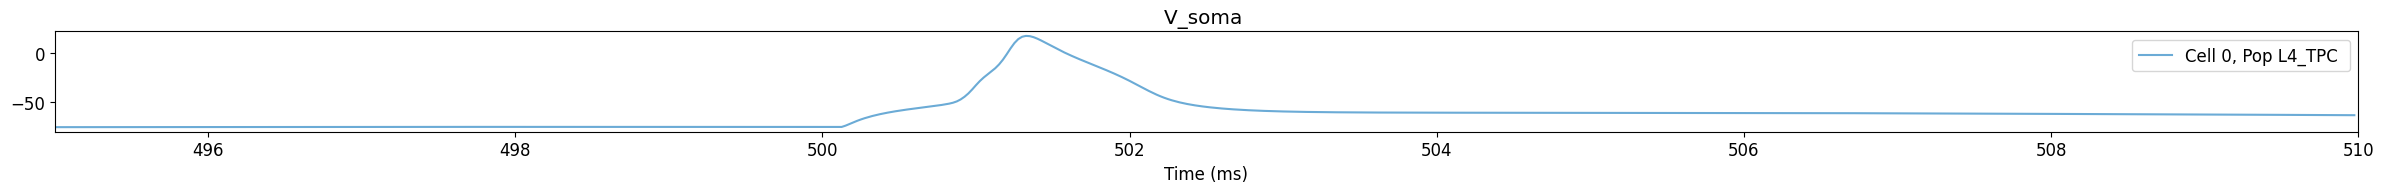

In [24]:
# sim.analysis.plotTraces(include= [ii for ii in range(1)], timeRange=[0,500], axis=True, overlay=True, oneFigPer='cell', figSize=(15,3.1));
sim.analysis.plotTraces(include= [ii for ii in range(1)], timeRange=[495,510], axis=True, overlay=True, oneFigPer='trace', figSize=(24,2.1));

Plotting recorded cell traces ... cell


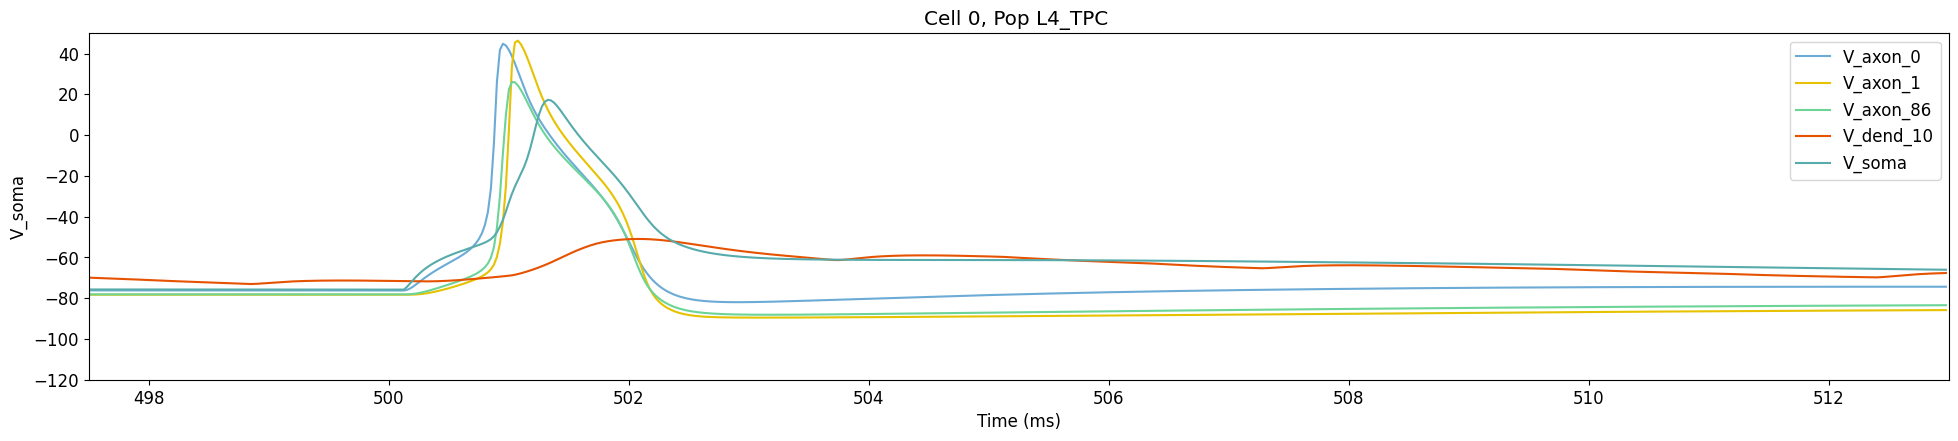

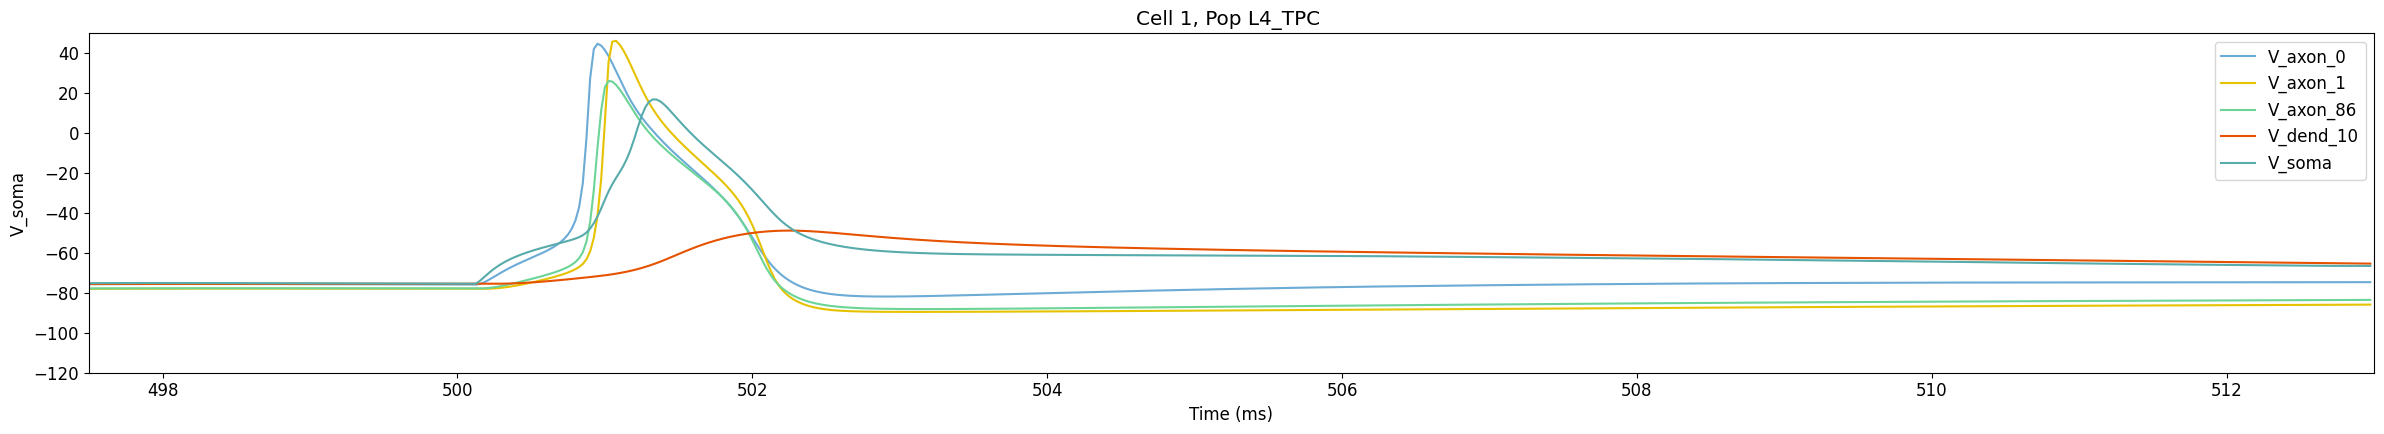

Preparing LFP data...
Plotting LFP time series...


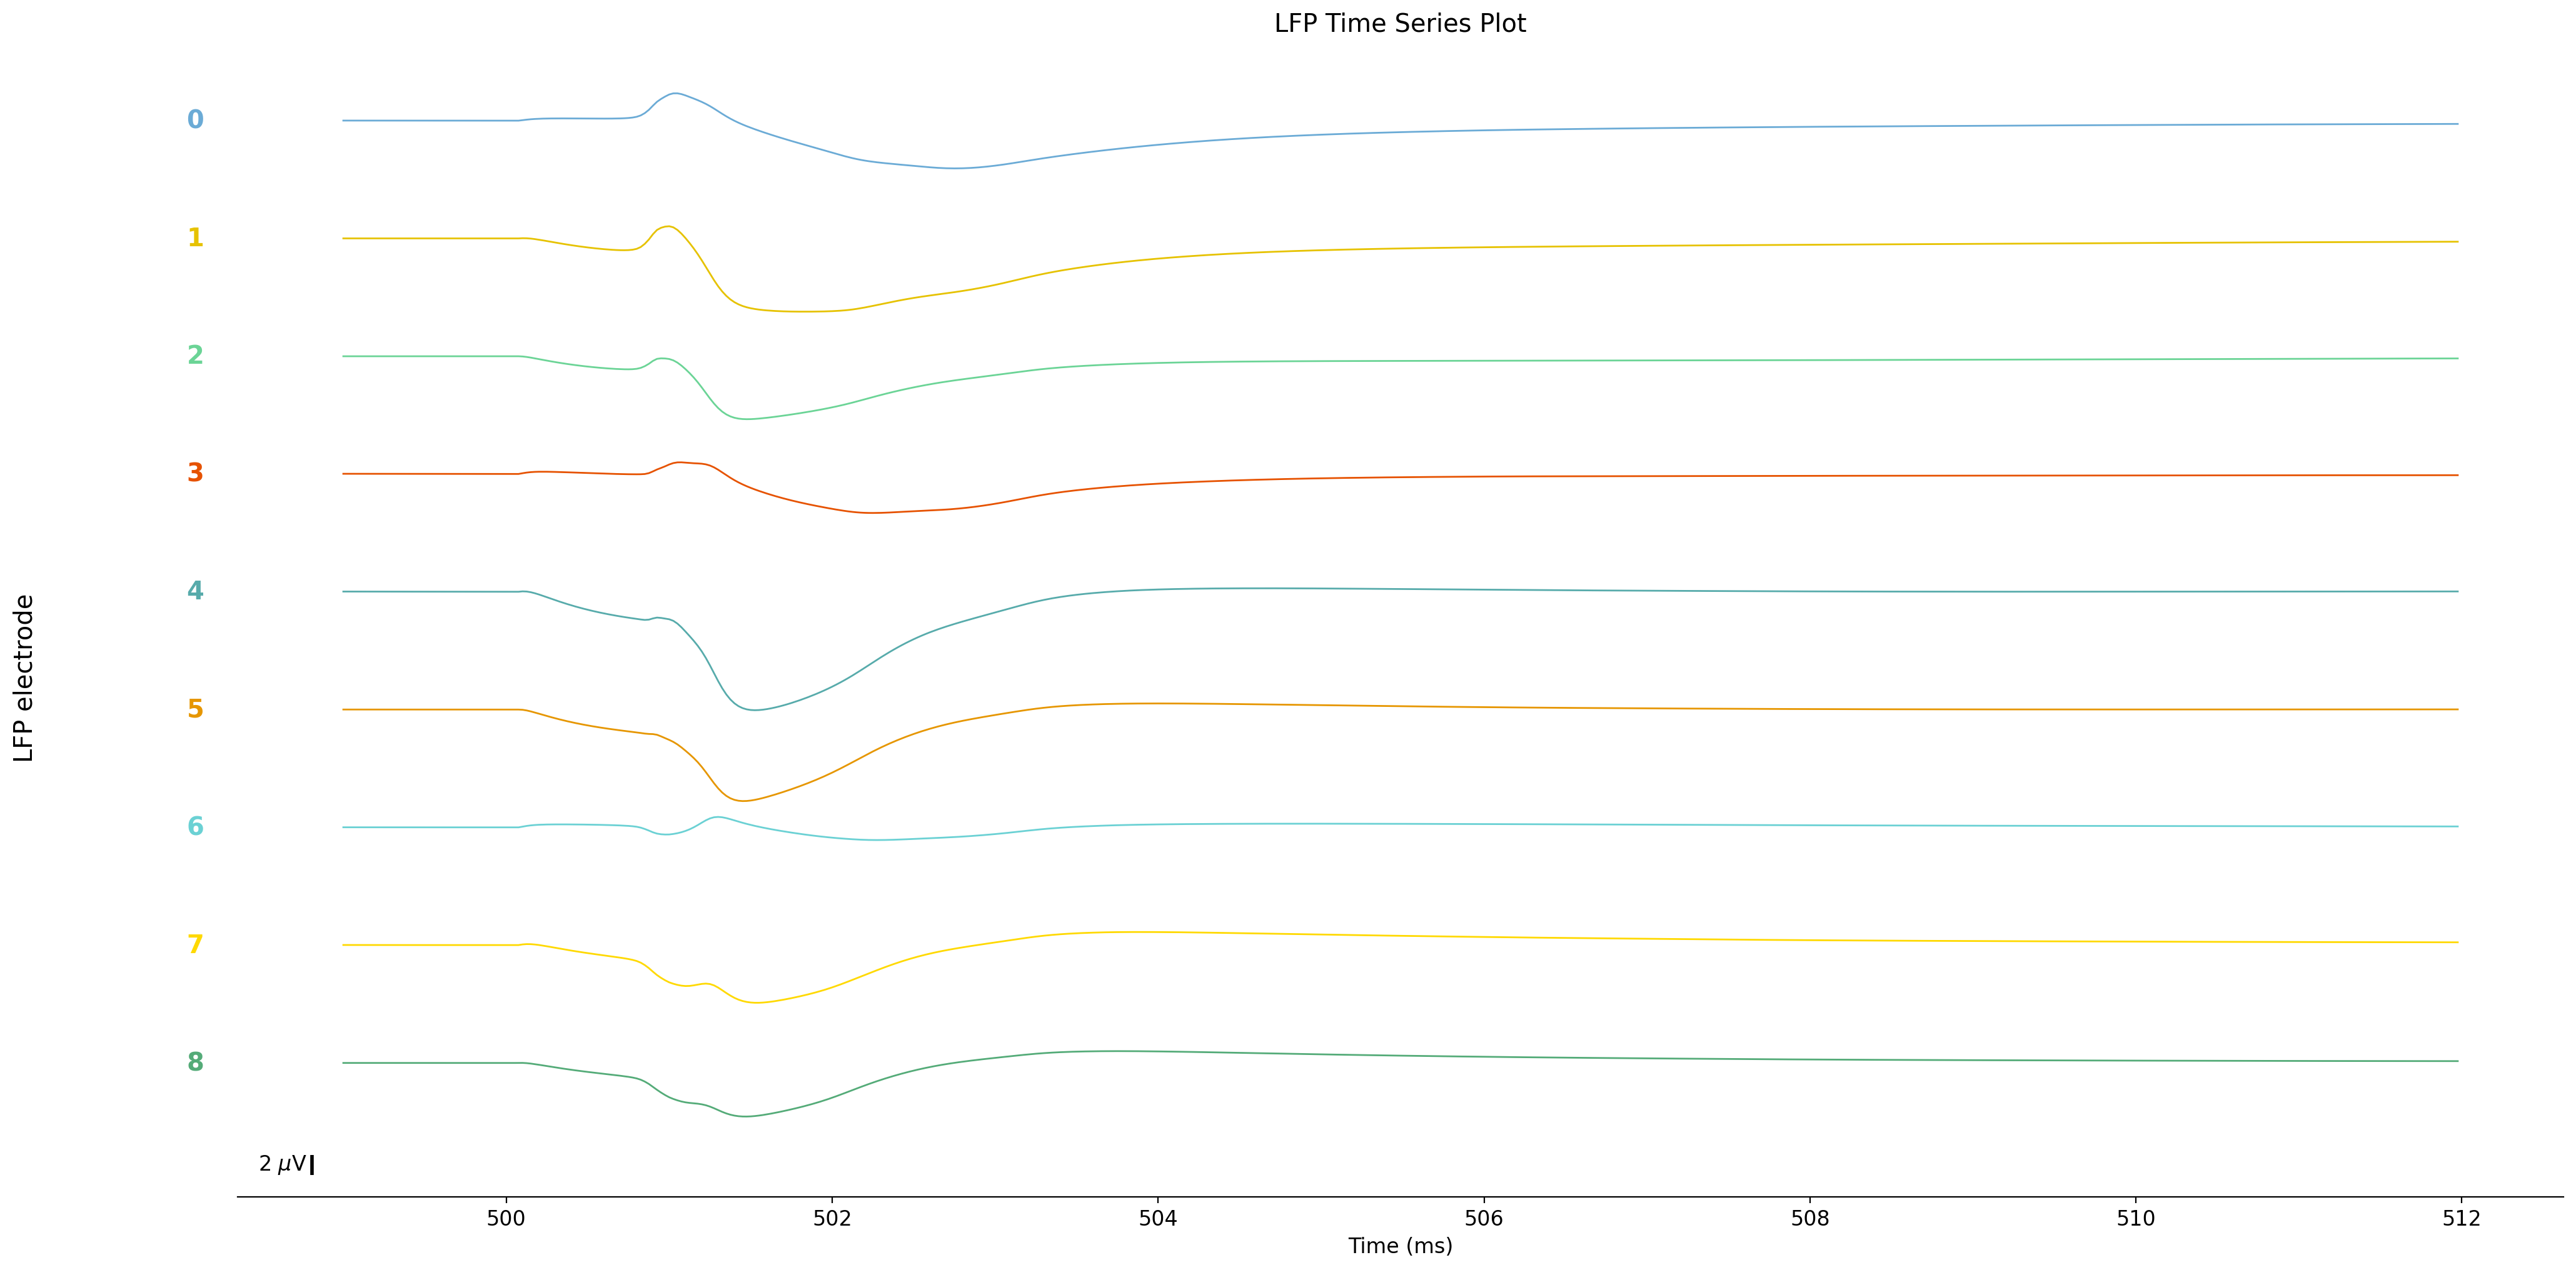

In [25]:
sim.analysis.plotTraces(include= [ii for ii in range(2)], timeRange=[497.5,513], ylim=[-120,50], axis=True, overlay=True, oneFigPer='cell', figSize=(24,4.5));
sim.analysis.plotLFP(electrodes=[ii for ii in range(len(cfg.recordLFP))], timeRange=[499,512], plots=['timeSeries'], figSize=(24,12.0))

In [26]:
cvals = []  # used to store total transfer resistance

trSegs = list(
            np.sum(sim.net.recXElectrode.getTransferResistance(0) * 1e3, axis=0)
        )  # convert from Mohm to kilohm
i = 0
for secName, sec in sim.net.cells[0].secs.items():
    nseg = sec['hObj'].nseg  # .geom.nseg
    for j in range(i,i+nseg):
        if trSegs[j] > 34:
            print(secName,trSegs[j])
    i += nseg
cvals.extend(trSegs)

Plotting LFP electrode locations...
Plotting 3D cell shape ...


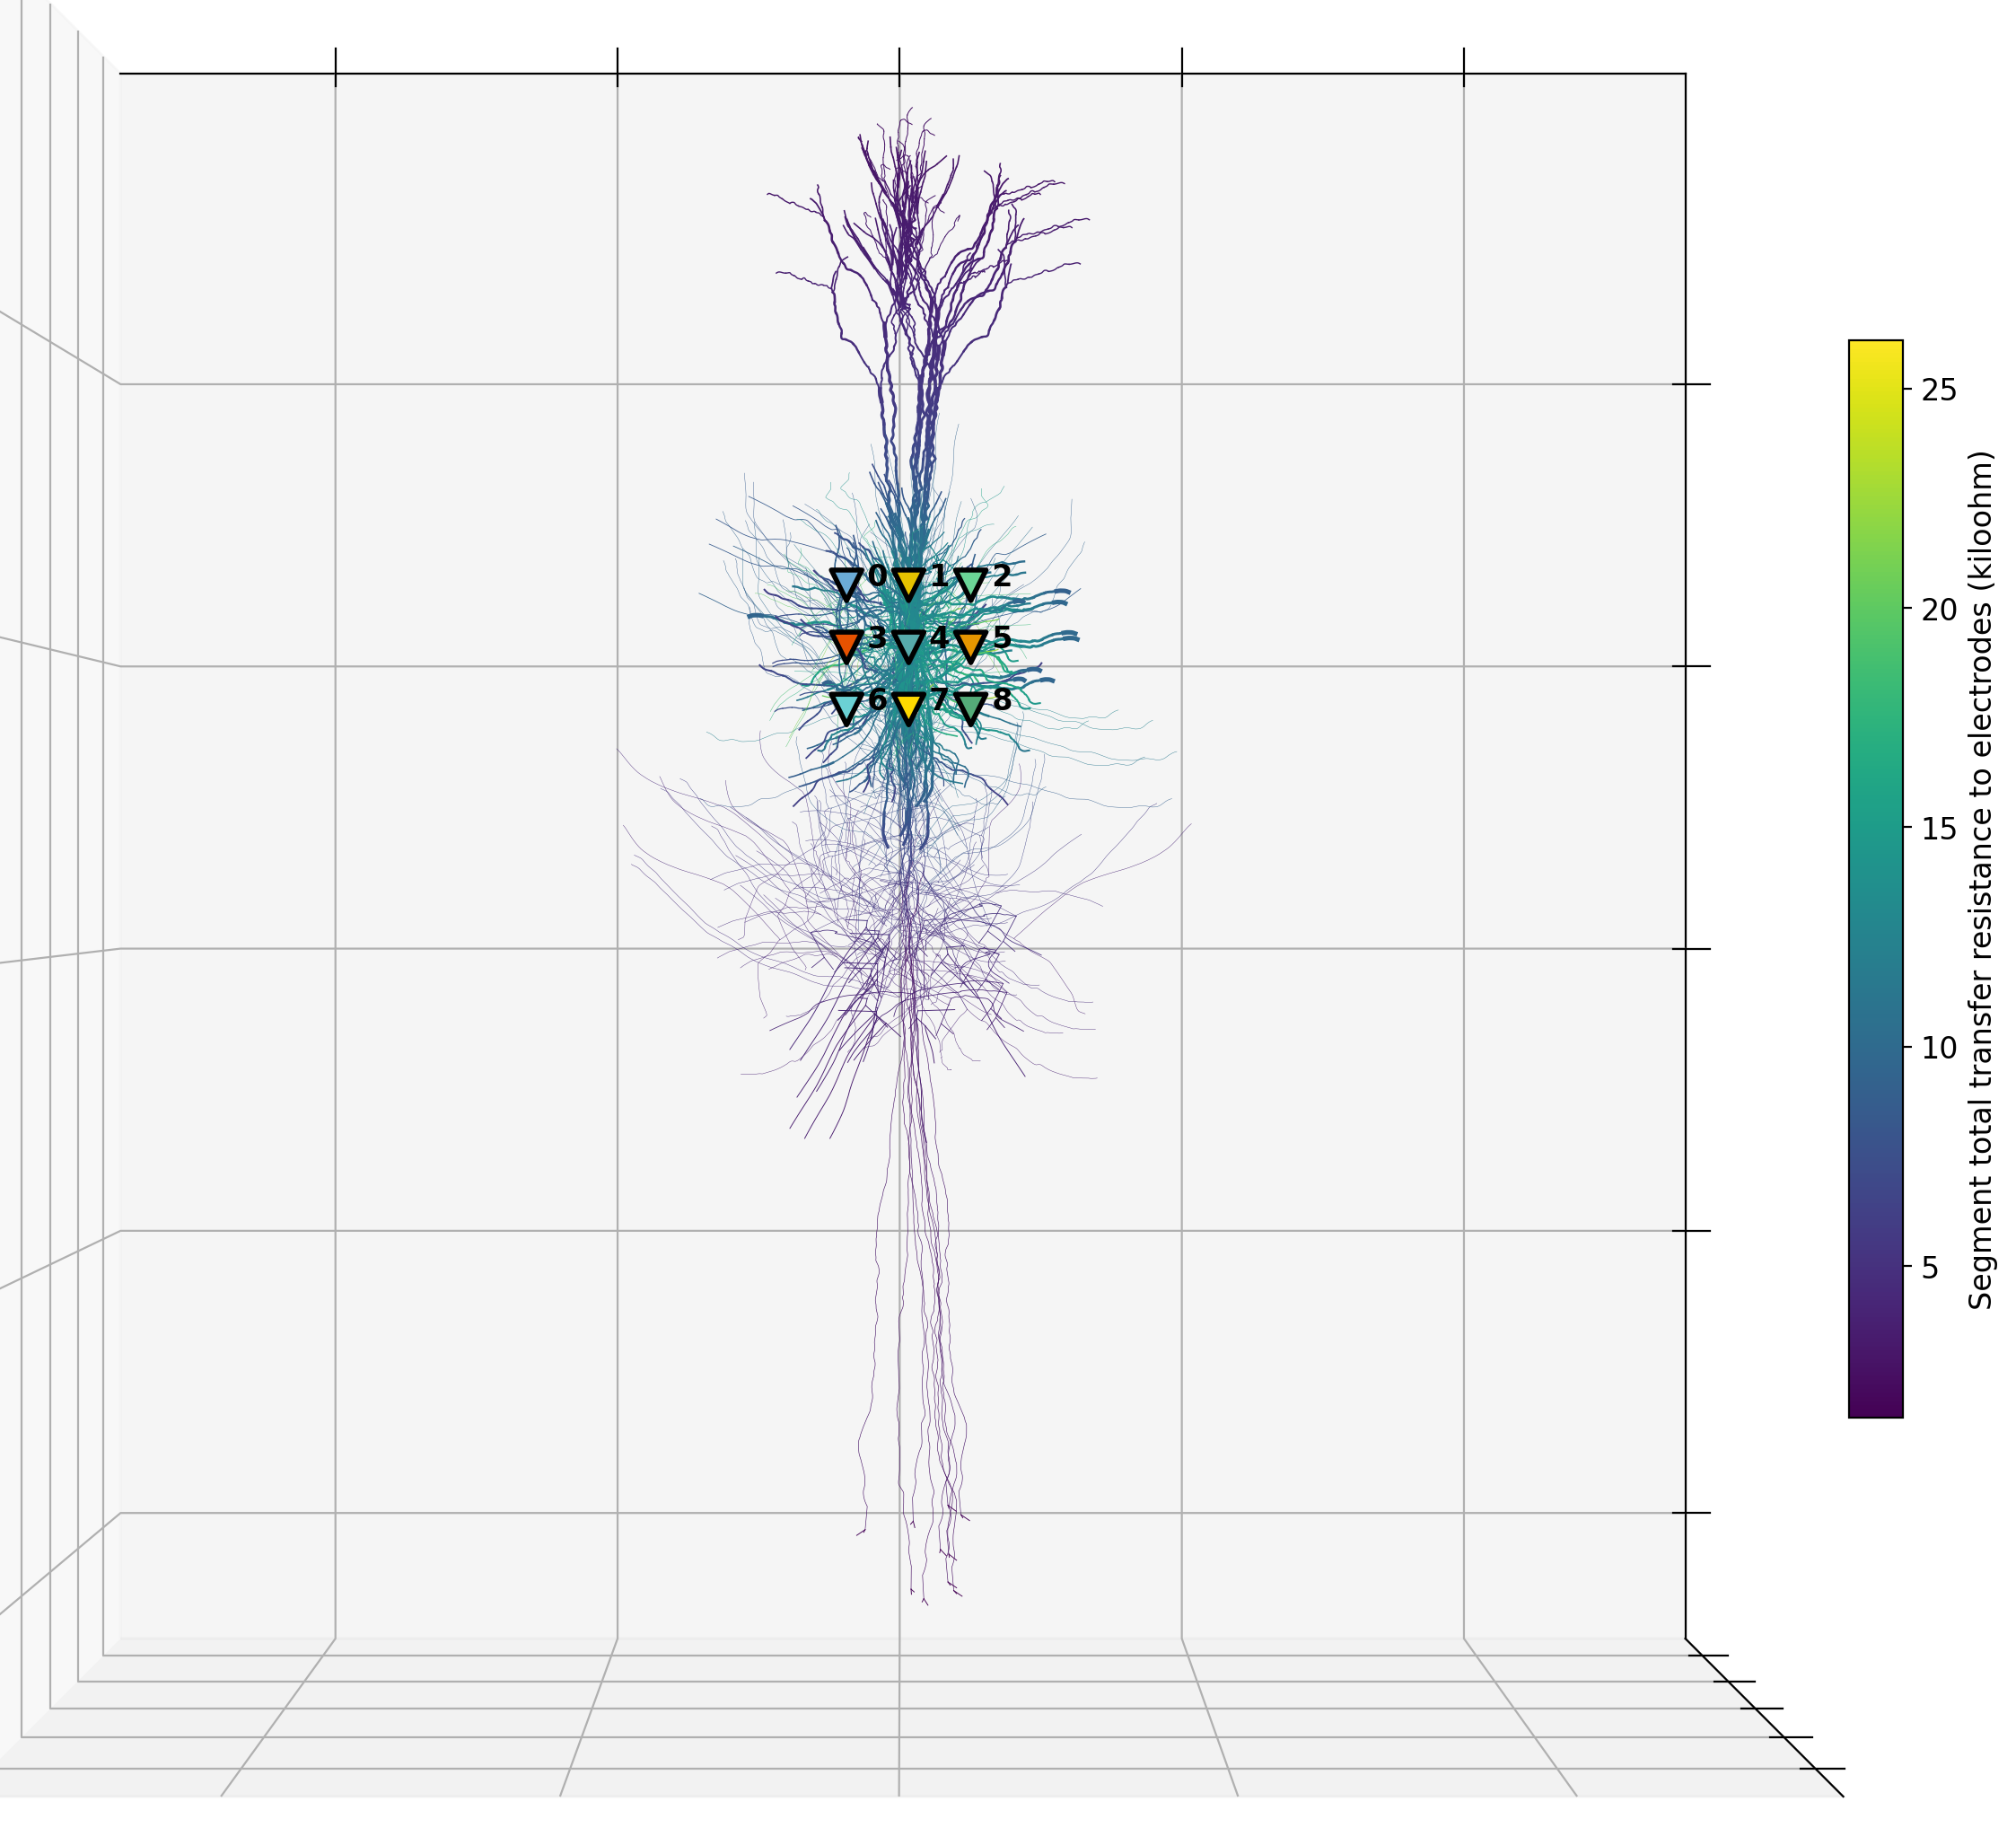

In [27]:
sim.analysis.plotLFP(electrodes=[3], timeRange=[299,304], plots=['locations'], figSize=(12,12.0))

Preparing LFP data...
Plotting LFP time series...


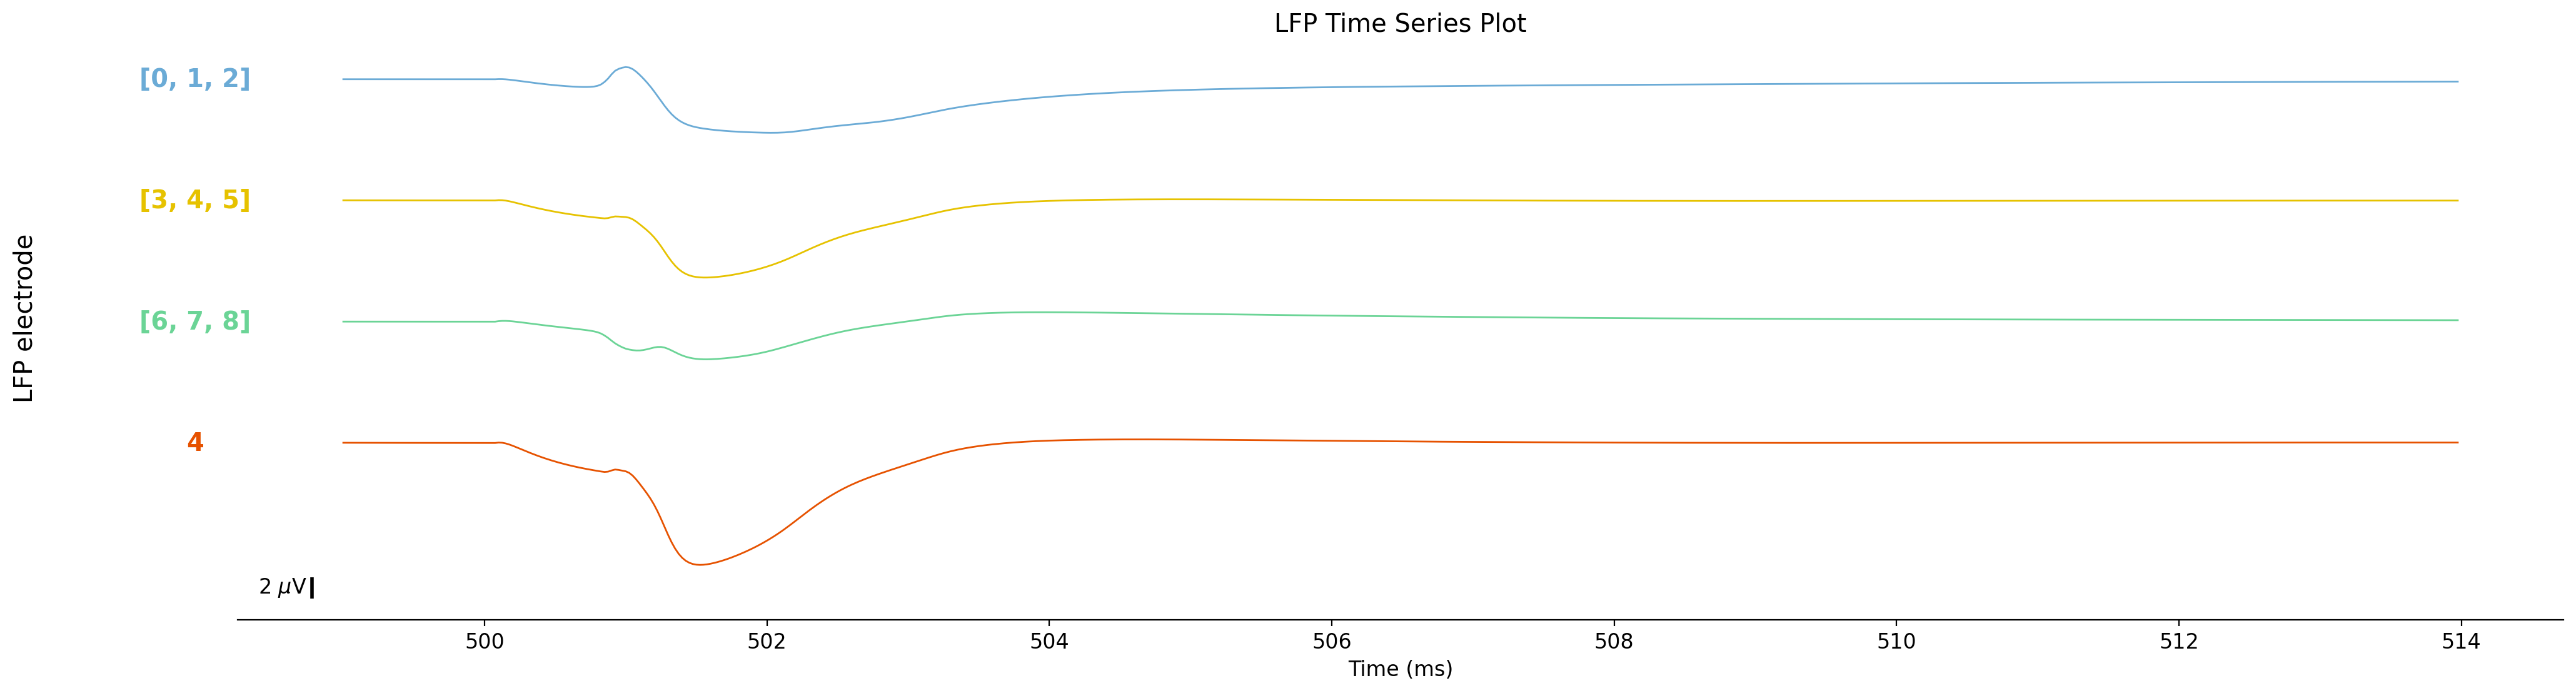

In [28]:
sim.analysis.plotLFP(electrodes=[[0,1,2], [3,4,5], [6,7,8], 4], timeRange=[499,514], plots=['timeSeries'], figSize=(24,6.0))

Plotting 3D cell shape ...


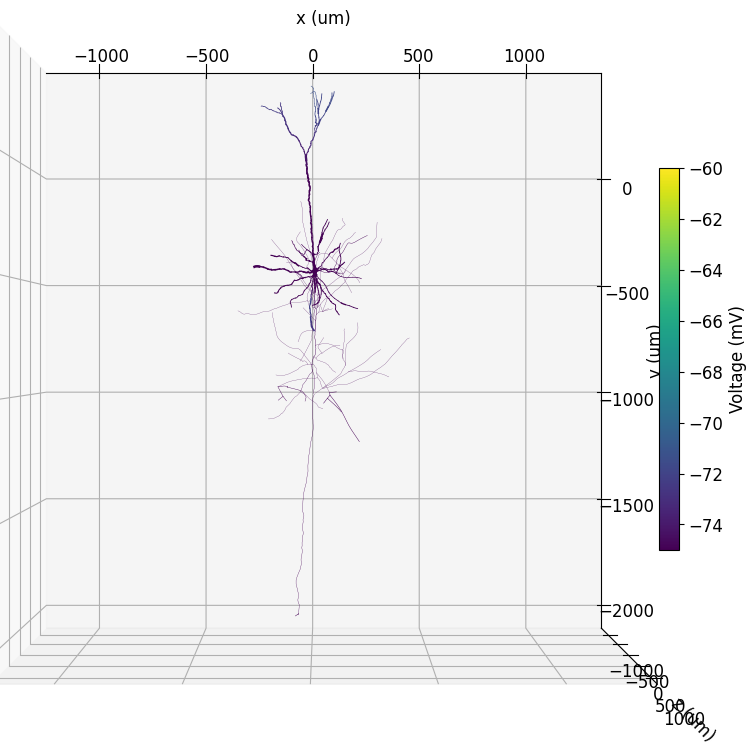

In [29]:
for ii in range(1):    
    sim.analysis.plotShape(includePre= [ii], includePost= [ii], 
        includeAxon=True, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-75, -60], showFig=False, synSize=2, saveFig=False, figSize=(8,8))

In [30]:
np.shape(sim.simData['LFP'])

(24000, 9)